In [3]:
import requests
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import platform
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:

df = pd.DataFrame(columns = ['URL', 'Name', 'Address', 'Rent', 'Beds'])

URL = 'https://www.apartments.com/jacksonville-fl/max-1-bedrooms/'
web_driver = None
if(web_driver != None):
    driver = web_driver
else:
    options = Options()
    options.headless = True
    if ('debian' in platform.platform()):
        driver = webdriver.Firefox(firefox_binary='/usr/bin/firefox-esr', options=options)
    else:
        driver = webdriver.Firefox(options=options)
driver.get(URL)

    # read the current page
soup = BeautifulSoup(driver.page_source, 'html.parser')

# soupify the current page
soup.prettify()

soup = soup.find('div', class_= 'placardContainer')

parse_page(soup, df)

for pageNo in range(2,16):
    URL = 'https://www.apartments.com/jacksonville-fl/max-1-bedrooms/'+ str(pageNo) + '/'

    
    driver.get(URL)

        # read the current page
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # soupify the current page
    soup.prettify()

    soup = soup.find('div', class_= 'placardContainer')

    parse_page(soup, df)
    

https://www.apartments.com/the-landings-at-san-marco-jacksonville-fl/we2dnrk/
The Landings at San Marco
2600 Art Museum Dr, Jacksonville, FL 32207
$1,108 - $1,314
1 Bed
https://www.apartments.com/red-bay-apartment-complex-jacksonville-fl/ksmqmkc/
Red Bay Apartment Complex
7528 Arlington Expy, Jacksonville, FL 32211
$850 - $1,249
1 Bed
https://www.apartments.com/oaks-at-normandy-apartments-jacksonville-fl/z8mr8ez/
Oaks at Normandy Apartments
7777 Normandy Blvd, Jacksonville, FL 32221
$1,249 - $1,299
1 Bed
https://www.apartments.com/coventry-park-apartments-jacksonville-fl/0mmsgv2/
Coventry Park Apartments
6650 Corporate Center Pky, Jacksonville, FL 32216
$1,264 - $3,188
1 Bed
https://www.apartments.com/club-at-charter-pointe-jacksonville-fl/v579s1g/
Club at Charter Pointe
5501 University Club Blvd N, Jacksonville, FL 32277
$1,005 - $1,170
1 Bed
https://www.apartments.com/northlake-apartments-jacksonville-fl/4wf2trj/
Northlake Apartments
2445 Dunn Ave, Jacksonville, FL 32218
$949 - $1,55

NoSuchWindowException: Message: Browsing context has been discarded
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:197:5
NoSuchWindowError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:706:5
assert.that/<@chrome://remote/content/shared/webdriver/Assert.sys.mjs:538:13
assert.open@chrome://remote/content/shared/webdriver/Assert.sys.mjs:147:4
GeckoDriver.prototype.navigateTo@chrome://remote/content/marionette/driver.sys.mjs:1045:39
despatch@chrome://remote/content/marionette/server.sys.mjs:318:40
execute@chrome://remote/content/marionette/server.sys.mjs:289:16
onPacket/<@chrome://remote/content/marionette/server.sys.mjs:262:20
onPacket@chrome://remote/content/marionette/server.sys.mjs:263:9
_onJSONObjectReady/<@chrome://remote/content/marionette/transport.sys.mjs:494:20


The below cell is a copy of the cell above, but with better comments. just want to make sure it works before i delete anything.

In [ ]:
from helper import parse_page

# Create an empty DataFrame to store apartment listings
df = pd.DataFrame(columns=['URL', 'Name', 'Address', 'Rent', 'Beds'])

# Define the base URL for apartment listings in Jacksonville, FL (1-bedroom max filter)
URL = 'https://www.apartments.com/jacksonville-fl/'

# Initialize the web driver variable
web_driver = None

# Check if an existing web driver instance is provided
if web_driver is not None:
    driver = web_driver
else:
    # Set up Selenium WebDriver options (headless mode for efficiency)
    options = Options()
    options.headless = True

    # Use a different Firefox binary path if running on Debian
    if 'debian' in platform.platform():
        driver = webdriver.Firefox(firefox_binary='/usr/bin/firefox-esr', options=options)
    else:
        driver = webdriver.Firefox(options=options)

# Open the first page of apartment listings
driver.get(URL)

# Parse the current page's HTML content
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Locate the main container that holds apartment listings
soup = soup.find('div', class_='placardContainer')

# extract and store listing data from the page
parse_page(soup, df)

# Loop through pages 2 to 15 to scrape additional listings
for pageNo in range(2, 16):
    # Construct the URL for the next page
    URL = f'https://www.apartments.com/jacksonville-fl/{pageNo}/'

    # Load the next page
    driver.get(URL)

    # Parse the page's HTML content
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Locate the main listing container
    soup = soup.find('div', class_='placardContainer')

    # Extract and store listing data from the page
    parse_page(soup, df)

In [5]:
df

,URL,Name,Address,Rent,Beds
0,https://www.apartments.com/lake-lofts-at-deerw...,Lake Lofts at Deerwood,"4360 Deerwood Lake Pky, Jacksonville, FL 32216","$1,250 - $1,535",1 Bed
1,https://www.apartments.com/11-east-forsyth-apa...,11 East Forsyth Apartments,"11 E Forsyth St, Jacksonville, FL 32202","$1,179 - $2,023",Studio - 1 Bed
2,https://www.apartments.com/golden-shores-of-ja...,Golden Shores of Jacksonville,"7703 Hare Ave, Jacksonville, FL 32211",$580 - $945,Studio - 1 Bed
3,https://www.apartments.com/river-house-jackson...,River House,"1655 Prudential Dr, Jacksonville, FL 32207","$1,549 - $1,999",Studio - 1 Bed
4,https://www.apartments.com/the-solera-at-kenda...,The Solera at Kendall West,"1462 Solera Ter, Jacksonville, FL 32211","$1,369 - $1,489",1 Bed
...,...,...,...,...,...
301,https://www.apartments.com/tidewater-at-atlant...,Tidewater at Atlantic Beach Apartment Homes,"2768 State Road A1a, Atlantic Beach, FL 32233","$1,280 - $1,650",1 Bed
302,https://www.apartments.com/riverside-at-orange...,Riverside at Orange Park,"606 Park Ave, Orange Park, FL 32073","$1,199 - $1,249",1 Bed
303,https://www.apartments.com/alexander-pointe-or...,Alexander Pointe,"2121 Burwick Ave, Orange Park, FL 32073","$1,335 - $1,470",1 Bed
304,https://www.apartments.com/victoria-at-orange-...,Victoria at Orange Park,"1710 Wells Rd, Orange Park, FL 32073","$1,065 - $1,336",1 Bed


In [ ]:
from helper import geocode_address
# Clean up the 'Address' column by removing unit numbers (anything after "Unit")
df['Address'] = df['Address'].apply(lambda x: x.split('Unit')[0])

# Import necessary modules for geocoding
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut


# Apply the geocode function to each address in the DataFrame and store results in a new 'Location' column
df['Location'] = df['Address'].apply(lambda x: geocode_address(x))


In [ ]:
import numpy as np  # Import NumPy for handling missing values

# Extract latitude from the 'Location' column, converting to float if the location is valid
# If the location is "NOT FOUND", store NaN (missing value)
df['Latitude'] = df['Location'].apply(lambda x: float(x[0]) if x != "NOT FOUND" else np.nan)

# Extract longitude from the 'Location' column, converting to float if the location is valid
df['Longitude'] = df['Location'].apply(lambda x: float(x[1]) if x != "NOT FOUND" else np.nan)

# Create a new DataFrame excluding rows where latitude or longitude is missing
dfSub = df.dropna(subset=['Latitude', 'Longitude'])

# Filter out locations with latitude greater than 32 (outside Jacksonville, error in function or address)
dfSub = dfSub[dfSub['Latitude'] < 32]

# Further filter locations where the absolute longitude is less than 82.2
# (Ensures only relevant geographic locations are included)
dfSub = dfSub[abs(dfSub['Longitude']) < 82.2]

KeyError: 'Location'

In [ ]:
# Import necessary libraries for geospatial data handling and visualization
from shapely.geometry import box  # Creates a bounding box for a defined area
from matplotlib import pyplot as plt  # For plotting
import geopandas as gpd  # Handles spatial data in a Pandas-like format
import contextily as ctx  # Adds basemap tiles for better visualization

# Define a bounding box around Jacksonville, FL using Shapely
# The coordinates represent (min_longitude, min_latitude, max_longitude, max_latitude)
jax_bbox = gpd.GeoDataFrame({
    'geometry': [box(-81.8, 30.1, -81.3, 30.6)]
}, crs="EPSG:4326")  # Set coordinate reference system to WGS84 (EPSG:4326)

# Convert latitude and longitude columns into a GeoPandas geometry column (point data)
dfSub['geometry'] = gpd.points_from_xy(dfSub['Longitude'], dfSub['Latitude'])

# Convert dfSub into a GeoDataFrame with the proper coordinate reference system (EPSG:4326)
# Then reproject the data to EPSG:3857 (Web Mercator), which is commonly used for mapping
dfSub = gpd.GeoDataFrame(dfSub, geometry='geometry', crs="EPSG:4326").to_crs(epsg=3857)

NameError: name 'dfSub' is not defined

Text(0.5, 80.7222222222222, '')

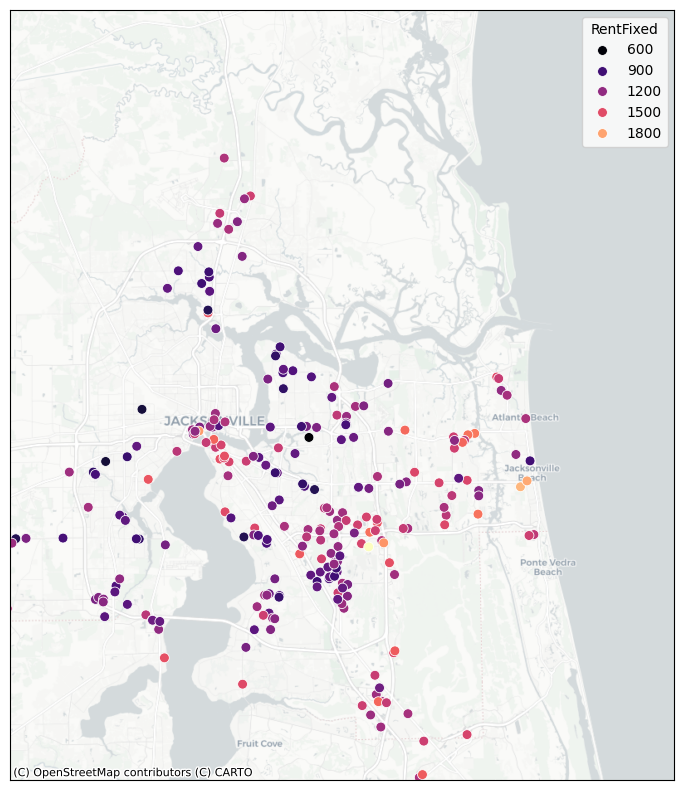

In [ ]:
# Import necessary libraries for visualization
import seaborn as sns  # For creating attractive statistical plots

# Convert the 'Rent' column to a numeric format for analysis
# - Splits the rent range at ' -' and takes the first value (lower bound)
# - Removes the dollar sign ($) and commas to clean the text
# - Converts the cleaned string to a numeric value, coercing errors to NaN
df['RentFixed'] = pd.to_numeric(df['Rent'].str.split(' -').str[0].str[1:].str.replace(',', ''), errors='coerce')

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10,10))  # Set figure size to 10x10 inches

# Plot the Jacksonville bounding box in Web Mercator projection (EPSG:3857)
# - `alpha=0` makes the box transparent
# - `edgecolor=None` removes the border outline
jax_bbox.to_crs(epsg=3857).plot(ax=ax, alpha=0, edgecolor=None)

# Add a basemap from CartoDB to provide geographical context
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Create a scatter plot of apartment locations
# - `x=dfSub.geometry.x` and `y=dfSub.geometry.y` plot latitude and longitude
# - `hue=df['RentFixed']` colors the points based on rent price
# - `palette='magma'` sets a visually appealing color scheme
# - `s=50` sets the point size
sns.scatterplot(x=dfSub.geometry.x, y=dfSub.geometry.y, ax=ax, hue=df['RentFixed'], palette='magma', s=50)

# Remove axis labels and ticks to keep the plot clean
plt.xticks([])
plt.yticks([])
plt.ylabel(None)
plt.xlabel(None)

In [97]:
dfUnits = pd.read_excel('final Df 10-26.xlsx')

In [98]:
dfUnits

,Complex URL,Floor Plan Name,Price,Unit Name,Square Footage,Availability,Beds,Baths,Complex Name,Address
0,https://www.apartments.com/the-reef-apartments...,Bali,1480,1415,640,Now,<span>1 bed</span>,<span>1 bath</span>,The Reef Apartments,"2753 Mayport Rd, Jacksonville, FL 32233"
1,https://www.apartments.com/the-reef-apartments...,Bali,1480,2421,640,Now,<span>1 bed</span>,<span>1 bath</span>,The Reef Apartments,"2753 Mayport Rd, Jacksonville, FL 32233"
2,https://www.apartments.com/the-reef-apartments...,Bali,1480,1215,640,Now,<span>1 bed</span>,<span>1 bath</span>,The Reef Apartments,"2753 Mayport Rd, Jacksonville, FL 32233"
3,https://www.apartments.com/the-reef-apartments...,Bimini,1625,1213,775,Now,<span>1 bed</span>,<span>1 bath</span>,The Reef Apartments,"2753 Mayport Rd, Jacksonville, FL 32233"
4,https://www.apartments.com/the-reef-apartments...,Biscayne,1580,2518,709,Nov 1,<span>1 bed</span>,<span>1 bath</span>,The Reef Apartments,"2753 Mayport Rd, Jacksonville, FL 32233"
...,...,...,...,...,...,...,...,...,...,...
8446,https://www.apartments.com/2037-meharry-ave-ja...,3 Bedroom | 2 Bathroom,$1101,NaN,"1,008 sq ft",Nov 18,3 bd,1 ba,NaN,"2037 Meharry Ave, Jacksonville, FL 32209"
8447,https://www.apartments.com/3319-plum-st-jackso...,3 Bedroom | 2 Bathroom,$1287,NaN,"1,035 sq ft",Nov 18,2 bd,1 ba,NaN,"3319 Plum St, Jacksonville, FL 32205"
8448,https://www.apartments.com/10988-traci-lynn-dr...,3 Bedroom | 2 Bathroom,$1664,NaN,"1,500 sq ft",Nov 18,3 bd,2.5 ba,NaN,"10988 Traci Lynn Dr, Jacksonville, FL 32218"
8449,https://www.apartments.com/226-e-44th-st-jacks...,3 Bedroom | 2 Bathroom,$1486,NaN,"1,312 sq ft",Nov 18,4 bd,2 ba,NaN,"226 E 44th St, Jacksonville, FL 32208"


In [50]:
#get rid of $ and , in price
dfUnits['Price'] = dfUnits['Price'].str.replace('$','')
dfUnits['Price'] = dfUnits['Price'].str.replace(',','')

#get rid of sq ft in Square Footage
dfUnits['Square Footage'] = dfUnits['Square Footage'].str.replace(' sq ft','')
#get rid of HTML artifacts
dfUnits['Beds'] = dfUnits['Beds'].str.replace('<span>','')
dfUnits['Beds'] = dfUnits['Beds'].str.replace('</span>','')
dfUnits['Baths'] = dfUnits['Baths'].str.replace('</span>','')
dfUnits['Baths'] = dfUnits['Baths'].str.replace('<span>','')
#get rid of bed/bath word
dfUnits['Beds'] = dfUnits['Beds'].str.replace('bed','')
dfUnits['Beds'] = dfUnits['Beds'].str.replace('bd','')
dfUnits['Baths'] = dfUnits['Baths'].str.replace('bath','')
dfUnits['Baths'] = dfUnits['Baths'].str.replace('ba','')
dfUnits

AttributeError: Can only use .str accessor with string values!

In [105]:
dfUnits['Location'] = dfUnits['Address'].apply(lambda x: geocode_address(x))

dfUnits

,Complex URL,Floor Plan Name,Price,Unit Name,Square Footage,Availability,Beds,Baths,Complex Name,Address,Location
0,https://www.apartments.com/the-reef-apartments...,Bali,1480,1415,640,Now,1,1,The Reef Apartments,"2753 Mayport Rd, Jacksonville, FL 32233","(30.363143253846424, -81.4221184492229)"
1,https://www.apartments.com/the-reef-apartments...,Bali,1480,2421,640,Now,1,1,The Reef Apartments,"2753 Mayport Rd, Jacksonville, FL 32233","(30.363143253846424, -81.4221184492229)"
2,https://www.apartments.com/the-reef-apartments...,Bali,1480,1215,640,Now,1,1,The Reef Apartments,"2753 Mayport Rd, Jacksonville, FL 32233","(30.363143253846424, -81.4221184492229)"
3,https://www.apartments.com/the-reef-apartments...,Bimini,1625,1213,775,Now,1,1,The Reef Apartments,"2753 Mayport Rd, Jacksonville, FL 32233","(30.363143253846424, -81.4221184492229)"
4,https://www.apartments.com/the-reef-apartments...,Biscayne,1580,2518,709,Nov 1,1,1,The Reef Apartments,"2753 Mayport Rd, Jacksonville, FL 32233","(30.363143253846424, -81.4221184492229)"
...,...,...,...,...,...,...,...,...,...,...,...
8446,https://www.apartments.com/2037-meharry-ave-ja...,3 Bedroom | 2 Bathroom,1101,NaN,"1,008",Nov 18,3,1,NaN,"2037 Meharry Ave, Jacksonville, FL 32209","(30.37416638128979, -81.69443891713578)"
8447,https://www.apartments.com/3319-plum-st-jackso...,3 Bedroom | 2 Bathroom,1287,NaN,"1,035",Nov 18,2,1,NaN,"3319 Plum St, Jacksonville, FL 32205","(30.314905, -81.7122854)"
8448,https://www.apartments.com/10988-traci-lynn-dr...,3 Bedroom | 2 Bathroom,1664,NaN,"1,500",Nov 18,3,2.5,NaN,"10988 Traci Lynn Dr, Jacksonville, FL 32218","(30.437023203761704, -81.6780515932892)"
8449,https://www.apartments.com/226-e-44th-st-jacks...,3 Bedroom | 2 Bathroom,1486,NaN,"1,312",Nov 18,4,2,NaN,"226 E 44th St, Jacksonville, FL 32208","(30.372572443604618, -81.6477007318132)"


In [139]:
dfUnits['Price'] = pd.to_numeric(dfUnits['Price'], errors = 'coerce')
dfUnits = dfUnits.dropna(subset=['Price'])
dfUnits['Square Footage'] = pd.to_numeric(dfUnits['Square Footage'], errors = 'coerce')
dfUnits = dfUnits.dropna(subset=['Square Footage'])
dfUnits = dfUnits[dfUnits['Price'] < 4500]

In [ ]:
dfUnits.to_excel('unitsWithLocation_copy.xlsx', sheet_name = 'Main')

In [127]:
dfUnits = pd.read_excel('unitsWithLocation.xlsx')

In [ ]:
# Extract latitude and longitude from the 'Location' column
# - If the location is found, convert the coordinates to float values
# - If the location is "NOT FOUND", assign NaN (to be dropped later)
dfUnits['Latitude'] = dfUnits['Location'].apply(lambda x: float(x[0]) if x != "NOT FOUND" else np.nan)
dfUnits['Longitude'] = dfUnits['Location'].apply(lambda x: float(x[1]) if x != "NOT FOUND" else np.nan)

# Remove rows where Latitude or Longitude is NaN (invalid locations)
dfUnitsSub = dfUnits.dropna(subset=['Latitude', 'Longitude'])

# Apply spatial filters:
# - Keep only points with Latitude < 32 (ensures data remains in the target region)
dfUnitsSub = dfUnitsSub[dfUnits['Latitude'] < 32]

# - Keep only points where Longitude is within the absolute limit of 82.2
dfUnitsSub = dfUnitsSub[abs(dfUnits['Longitude']) < 82.2]

# Convert filtered Latitude and Longitude data into a geometry column
dfUnitsSub['geometry'] = gpd.points_from_xy(dfUnitsSub['Longitude'], dfUnitsSub['Latitude'])

# Convert dfUnitsSub into a GeoDataFrame with spatial reference system EPSG:4326 (WGS 84)
dfUnitsSub = gpd.GeoDataFrame(dfUnitsSub, geometry='geometry', crs="EPSG:4326")

# Reproject the GeoDataFrame to EPSG:3857 (Web Mercator) for mapping compatibility
dfUnitsSub = dfUnitsSub.to_crs(epsg=3857)

C:\Users\Waxli\AppData\Local\Temp\ipykernel_12312\1171377508.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfUnitsSub = dfUnitsSub[dfUnits['Latitude'] < 32]
C:\Users\Waxli\AppData\Local\Temp\ipykernel_12312\1171377508.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfUnitsSub = dfUnitsSub[abs(dfUnits['Longitude']) < 82.2]


If restarted

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load apartment unit data from an Excel file
dfUnits = pd.read_excel('unitsWithLocation.xlsx')

# Convert the 'Price' column to a numeric format
# - Coerce errors to NaN (ensures non-numeric values are ignored)
dfUnits['Price'] = pd.to_numeric(dfUnits['Price'], errors='coerce')

# Drop rows where 'Price' is NaN (removes listings with missing price data)
dfUnits = dfUnits.dropna(subset=['Price'])

# Filter out listings with unrealistically high prices (e.g., > $5000)
dfUnits = dfUnits[dfUnits['Price'] < 5000]

# Get the number of unique locations (before processing coordinates)
dfUnits['Location'].nunique()

# Extract latitude and longitude from the 'Location' column
# - Location format: "(latitude, longitude)"
# - Removes parentheses and converts values to floats
dfUnits['Latitude'] = dfUnits['Location'].apply(lambda x: float(x.split(',')[0][1:]) if x != "NOT FOUND" else np.nan)
dfUnits['Longitude'] = dfUnits['Location'].apply(lambda x: float(x.split(',')[1][:-1]) if x != "NOT FOUND" else np.nan)

485

In [ ]:
dfUnits.head()

Lets do some K-Means Clustering

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

intermediate cleaning

In [ ]:
dfUnits['Square Footage'] = dfUnits['Square Footage'].str.replace(',', '').astype('float').round(1)


,Latitude,Longitude,Square Footage,Price,DollarperSqFoot,y,geometry
0,30.363143,-81.422118,640.000000,1480,2.312500,3,POINT (-9063868.765 3550314.451)
1,30.363143,-81.422118,640.000000,1480,2.312500,3,POINT (-9063868.765 3550314.451)
2,30.363143,-81.422118,640.000000,1480,2.312500,3,POINT (-9063868.765 3550314.451)
3,30.363143,-81.422118,775.000000,1625,2.096774,3,POINT (-9063868.765 3550314.451)
4,30.363143,-81.422118,709.000000,1580,2.228491,3,POINT (-9063868.765 3550314.451)
...,...,...,...,...,...,...,...
6699,30.374166,-81.694439,1008.000000,1101,1.092262,0,POINT (-9094183.341 3551736.684)
6700,30.314905,-81.712285,1035.000000,1287,1.243478,2,POINT (-9096170.002 3544092.508)
6701,30.437023,-81.678052,1500.000000,1664,1.109333,0,POINT (-9092359.112 3559849.704)
6702,30.372572,-81.647701,1312.000000,1486,1.132622,2,POINT (-9088980.47 3551531.02)


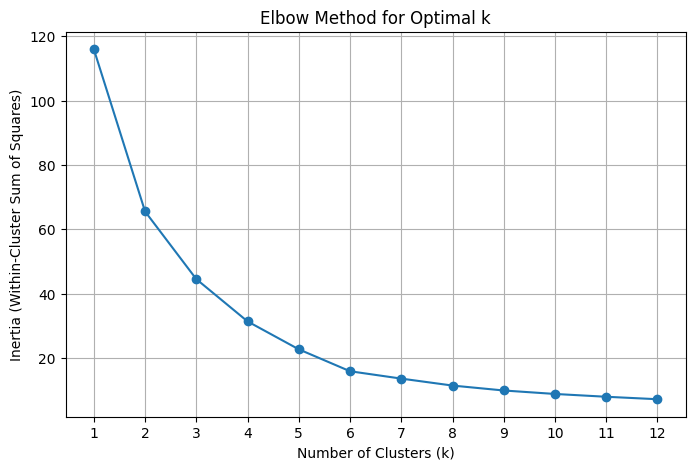

In [110]:
from sklearn import metrics
from scipy.spatial.distance import cdist

K_range = range(1,13)

inertia_values = []

for k in K_range:
    model = KMeans(n_clusters=k, random_state = 42, n_init = 10)
    model.fit(X[['Longitude', 'Latitude']])
    inertia_values.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_values, marker='o', linestyle = '-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [127]:
X = dfUnits[['Latitude', 'Longitude', 'Square Footage', 'Price']].dropna()
X['Latitude'] = pd.to_numeric(X['Latitude'], errors='coerce')
X['Longitude'] = pd.to_numeric(X['Longitude'], errors='coerce')
X['DollarperSqFoot'] = X['Price'] / X['Square Footage']
X = X.dropna()


model = KMeans(n_clusters = 6)
y_means = model.fit_predict(X[['Longitude', 'Latitude']])
X['y'] = y_means
#X['Neighborhood'] = X['']
print(X['y'].unique())
X

[1 4 0 2 5 3]


,Latitude,Longitude,Square Footage,Price,DollarperSqFoot,y
0,30.363143,-81.422118,640.000000,1480,2.312500,1
1,30.363143,-81.422118,640.000000,1480,2.312500,1
2,30.363143,-81.422118,640.000000,1480,2.312500,1
3,30.363143,-81.422118,775.000000,1625,2.096774,1
4,30.363143,-81.422118,709.000000,1580,2.228491,1
...,...,...,...,...,...,...
6699,30.374166,-81.694439,1008.000000,1101,1.092262,0
6700,30.314905,-81.712285,1035.000000,1287,1.243478,0
6701,30.437023,-81.678052,1500.000000,1664,1.109333,5
6702,30.372572,-81.647701,1312.000000,1486,1.132622,0


In [140]:
neighborhoodDict = {
    0: "Downtown",
    1: "Beaches",
    2:"Orange Park",
    3: "E-Town",
    4: "Windy Hills",
    5:"Northside",

}

def get_neighborhood(clusterNumber):
    return(neighborhoodDict[clusterNumber])

X['Neighborhood'] = X['y'].apply(get_neighborhood)


In [132]:
from shapely.geometry import box
from matplotlib import pyplot as plt
import geopandas as gpd
import contextily as ctx
jax_bbox = gpd.GeoDataFrame({
    'geometry': [box(-81.8, 30.1, -81.3, 30.6)]
}, crs="EPSG:4326")
X['geometry'] = gpd.points_from_xy(X['Longitude'], X['Latitude'])
X = gpd.GeoDataFrame(X, geometry='geometry', crs="EPSG:4326").to_crs(epsg=3857)

In [121]:
X

,Latitude,Longitude,Square Footage,Price,DollarperSqFoot,y,Neighborhood,geometry
0,30.363143,-81.422118,640.000000,1480,2.312500,3,Beaches,POINT (-9063868.765 3550314.451)
1,30.363143,-81.422118,640.000000,1480,2.312500,3,Beaches,POINT (-9063868.765 3550314.451)
2,30.363143,-81.422118,640.000000,1480,2.312500,3,Beaches,POINT (-9063868.765 3550314.451)
3,30.363143,-81.422118,775.000000,1625,2.096774,3,Beaches,POINT (-9063868.765 3550314.451)
4,30.363143,-81.422118,709.000000,1580,2.228491,3,Beaches,POINT (-9063868.765 3550314.451)
...,...,...,...,...,...,...,...,...
6699,30.374166,-81.694439,1008.000000,1101,1.092262,4,Downtown,POINT (-9094183.341 3551736.684)
6700,30.314905,-81.712285,1035.000000,1287,1.243478,6,Arlington,POINT (-9096170.002 3544092.508)
6701,30.437023,-81.678052,1500.000000,1664,1.109333,1,Windy Hills,POINT (-9092359.112 3559849.704)
6702,30.372572,-81.647701,1312.000000,1486,1.132622,4,Downtown,POINT (-9088980.47 3551531.02)


Text(0.5, 80.7222222222222, '')

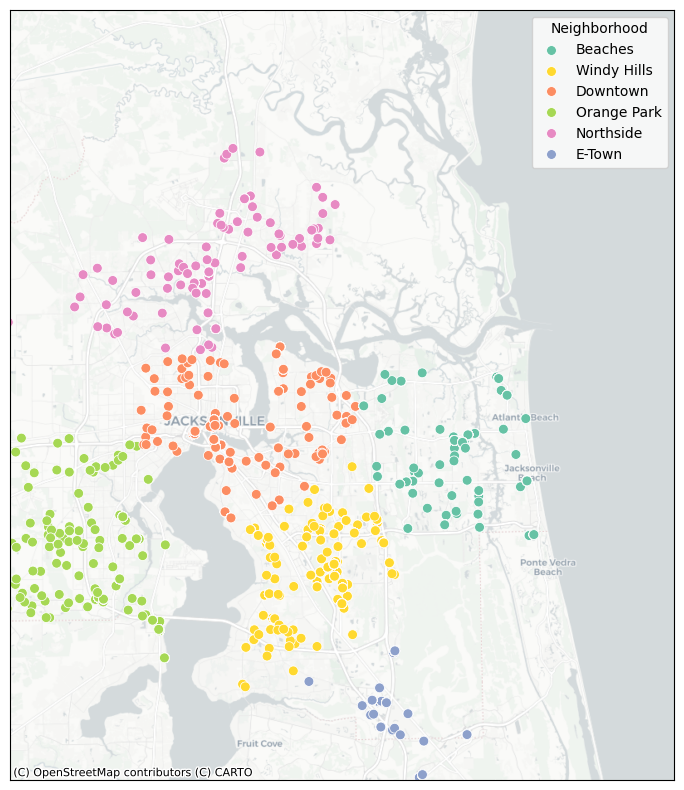

In [141]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10,10))
jax_bbox.to_crs(epsg=3857).plot(ax = ax, alpha = 0, edgecolor = None)
ctx.add_basemap(ax, source = ctx.providers.CartoDB.Positron)
unique_classes = sorted(X['Neighborhood'].unique())
palette = sns.color_palette('Set2')
sns.scatterplot(x=X.geometry.x, y=X.geometry.y, ax=ax, hue=X['Neighborhood'], palette=dict(zip(unique_classes, palette)), s=50)
plt.xticks([])
plt.yticks([])
plt.ylabel(None)
plt.xlabel(None)

In [92]:
print(sorted(X['y'].unique()))


[np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8)]


In [142]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('DollarperSqFoot ~ C(Neighborhood)', data = X).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Increase float precision display
pd.options.display.float_format = '{:12f}'.format  # Adjust decimal places as needed

anova_table

,sum_sq,df,F,PR(>F)
C(Neighborhood),114.499659,5.000000,150.942778,0.000000
Residual,1014.806049,6689.000000,NaN,NaN


In [143]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(X['DollarperSqFoot'], X['Neighborhood'], alpha=0.05)
print("\nTukey HSD Results:\n", tukey_results)


Tukey HSD Results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Beaches    Downtown  -0.0755    0.0 -0.1201 -0.0308   True
    Beaches      E-Town   0.0448 0.1732 -0.0095   0.099  False
    Beaches   Northside  -0.3363    0.0 -0.3934 -0.2793   True
    Beaches Orange Park   -0.347    0.0 -0.3964 -0.2977   True
    Beaches Windy Hills  -0.1455    0.0 -0.1881  -0.103   True
   Downtown      E-Town   0.1203    0.0  0.0692  0.1714   True
   Downtown   Northside  -0.2608    0.0 -0.3149 -0.2068   True
   Downtown Orange Park  -0.2716    0.0 -0.3174 -0.2257   True
   Downtown Windy Hills    -0.07    0.0 -0.1085 -0.0316   True
     E-Town   Northside  -0.3811    0.0 -0.4433 -0.3189   True
     E-Town Orange Park  -0.3918    0.0 -0.4471 -0.3366   True
     E-Town Windy Hills  -0.1903    0.0 -0.2396 -0.1411   True
  Northside Orange Park  -0.0107 0

C:\Users\Waxli\AppData\Local\Temp\ipykernel_21348\490813855.py:6: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data = tukey_df, x = "meandiff", y = 'group1', hue = "reject", palette = {True: "red", False: "gray"}, dodge = False, join = False)


<Axes: xlabel='meandiff', ylabel='group1'>

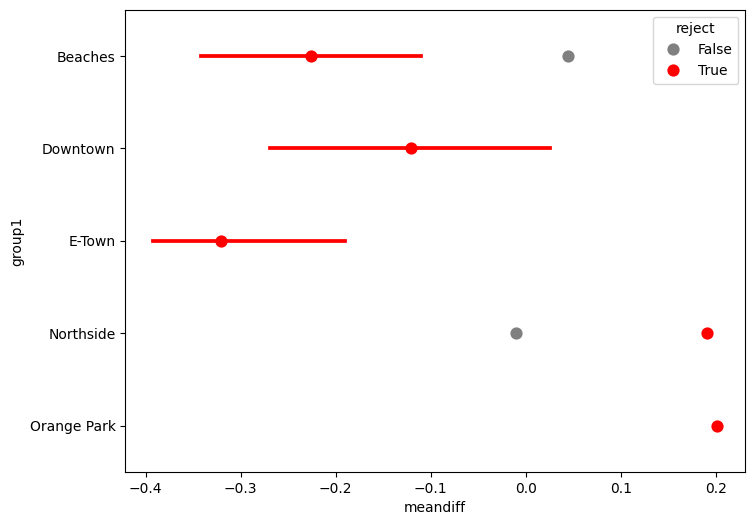

In [150]:
fig, ax = plt.subplots(figsize=(8,6))

tukey_df = pd.DataFrame(data=tukey_results.summary().data[1:], columns=tukey_results.summary().data[0])
tukey_df

sns.pointplot(data = tukey_df, x = "meandiff", y = 'group1', hue = "reject", palette = {True: "red", False: "gray"}, dodge = False, join = False)


<BarContainer object of 6 artists>

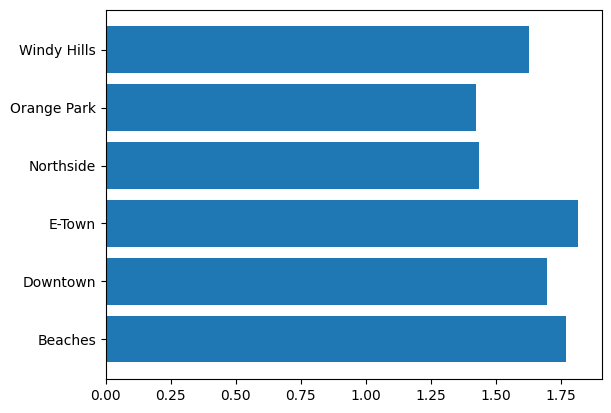

In [158]:
neighborhoodMeans = X[['Neighborhood', 'DollarperSqFoot']].groupby(by = 'Neighborhood').mean()
neighborhoodMeans
plt.barh(neighborhoodMeans.index, neighborhoodMeans['DollarperSqFoot'])